In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df_dailies=pd.read_csv('dailies_concat.csv')
df_sleeps=pd.read_csv('sleeps_concat.csv')
df_spo2=pd.read_csv('sleepSpo2_concat.csv')
df_level=pd.read_csv('levelsmap_concat.csv')
#df_hearteate=pd.read_csv('heartrate_concat.csv')
#檔案太大merge 不了
df_epochs=pd.read_csv('epochs_concat.csv')
df_activities=pd.read_csv('activities_concat.csv')

In [3]:
print('dailies',df_dailies.shape)
print('sleeps',df_sleeps.shape)
print('spo2',df_spo2.shape)
print('levelmap',df_level.shape)
#print('heartrate',df_hearteate.shape)
print('epochs',df_epochs.shape)
print('activities',df_activities.shape)

dailies (6301, 31)
sleeps (5767, 12)
spo2 (811593, 5)
levelmap (119568, 6)
epochs (348686, 15)
activities (539, 19)


## 空值處理 ##
(未完)

In [4]:
#df_sleeps.isnull().sum()
df_dailies.isnull().sum()

activeKilocalories                       1
activeTimeInSeconds                      1
activityStressDurationInSeconds        305
activityType                             1
averageHeartRateInBeatsPerMinute       285
averageStressLevel                       2
bmrKilocalories                          1
date                                  4132
distanceInMeters                         1
durationInSeconds                        1
floorsClimbed                            1
floorsClimbedGoal                        1
highStressDurationInSeconds            971
intensityDurationGoalInSeconds           1
lowStressDurationInSeconds             350
maxHeartRateInBeatsPerMinute           285
maxStressLevel                         274
mediumStressDurationInSeconds          470
minHeartRateInBeatsPerMinute           285
moderateIntensityDurationInSeconds       1
id                                       0
restStressDurationInSeconds            408
restingHeartRateInBeatsPerMinute       277
startTimeIn

### epoch+dailies=df_e_d ###


In [5]:
df_epochs=pd.read_csv('epochs_concat.csv')
df_dailies=pd.read_csv('dailies_concat.csv')
df_dailies['startTimeInSeconds'] = pd.to_datetime(df_dailies['startTimeInSeconds'],unit='s')
df_dailies=df_dailies.rename(columns={'startTimeInSeconds':'new_date'})
df_epochs['startTimeInSeconds'] = pd.to_datetime(df_epochs['startTimeInSeconds'],unit='s')
df_epochs=df_epochs.rename(columns={'startTimeInSeconds':'new_date'})
df_dailies['id']=df_dailies['id'].str.replace('dailies','')
df_epochs['id']=df_epochs['id'].str.replace('epochs','')
df_e_d=pd.merge(df_dailies,df_epochs,on=['id','new_date'],suffixes=('_dailies', '_epochs'))
df_e_d.drop(columns=['activityType_dailies'])
df_e_d=df_e_d.rename(columns={'activityType_epochs':'activityType'})
df_e_d=df_e_d.drop(columns=['summaryId_epochs'])
df_e_d=df_e_d.rename(columns={'summaryId_dailies':'summaryId'})
df_e_d=df_e_d.drop(columns=['activityType_dailies'])


/////////////////
以上別動
////////////////
=========================

<font color=#FF6600> epochs+dailies<font color>
====

In [6]:
df_e_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7587 entries, 0 to 7586
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   activeKilocalories_dailies          7587 non-null   float64       
 1   activeTimeInSeconds_dailies         7587 non-null   float64       
 2   activityStressDurationInSeconds     7298 non-null   float64       
 3   averageHeartRateInBeatsPerMinute    7327 non-null   float64       
 4   averageStressLevel                  7587 non-null   float64       
 5   bmrKilocalories                     7587 non-null   float64       
 6   date_dailies                        2752 non-null   float64       
 7   distanceInMeters_dailies            7587 non-null   float64       
 8   durationInSeconds_dailies           7587 non-null   float64       
 9   floorsClimbed                       7587 non-null   float64       
 10  floorsClimbedGoal       

In [7]:
df_e_d[['steps_dailies','steps_epochs']]

,steps_dailies,steps_epochs
0,10289.0,0.0
1,529.0,0.0
2,17175.0,0.0
3,1782.0,67.0
4,1782.0,0.0
...,...,...
7582,1435.0,0.0
7583,256.0,47.0
7584,256.0,0.0
7585,4702.0,0.0


In [8]:
df_e_d['stepsGoal_complete?']=df_e_d['steps_dailies']/df_e_d['stepsGoal']
df_e_d['floorClimbed_complete?']=df_e_d['floorsClimbed']/df_e_d['floorsClimbedGoal']


<AxesSubplot:>

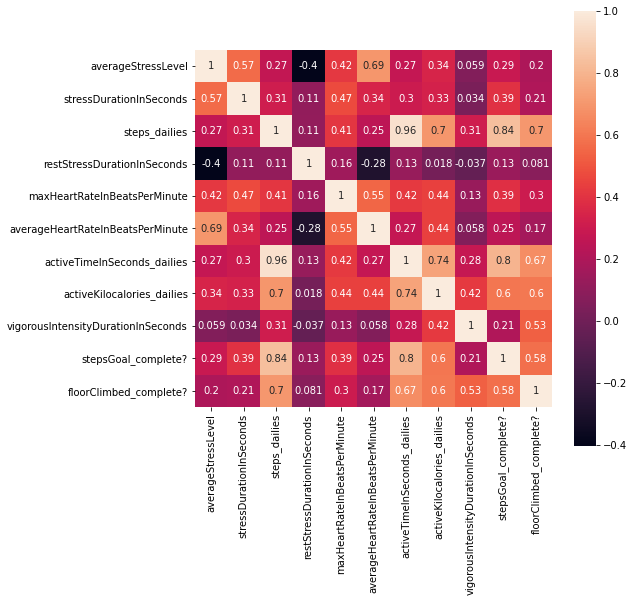

In [9]:
test=df_e_d[['averageStressLevel','stressDurationInSeconds','steps_dailies','restStressDurationInSeconds',
'maxHeartRateInBeatsPerMinute','averageHeartRateInBeatsPerMinute','activeTimeInSeconds_dailies','activeKilocalories_dailies',
'vigorousIntensityDurationInSeconds','stepsGoal_complete?','floorClimbed_complete?']]
plt.figure(figsize=(8,8))
test.corr()
sns.heatmap(test.corr(),square=True,annot=True)

壓力大小分開


In [10]:
id_group=df_e_d.groupby('id')
print('幸福小鬼',id_group['averageStressLevel'].mean().sort_values().head())
print('壓力大的可憐人',id_group['averageStressLevel'].mean().sort_values().tail())

幸福小鬼 id
1102_mr__10      7.463768
1102_mr__16     11.333333
1102_mrw__10    13.145299
1102_mrw__8     13.472727
1101_mr__1      18.015385
Name: averageStressLevel, dtype: float64
壓力大的可憐人 id
1102_mr__7      40.490566
1091_mr__3      40.924051
1101_mr__9      41.022727
1091_uty__14    42.357143
1102_mr__12     53.111111
Name: averageStressLevel, dtype: float64


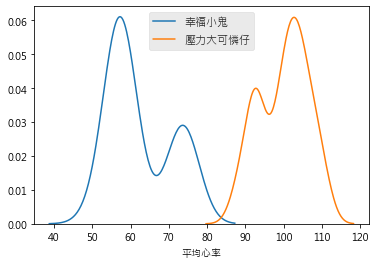

In [11]:
#顯著差異
_1102_mr__10=id_group.get_group('1102_mr__10')
_1102_mr__12 =id_group.get_group('1102_mr__12')

x=_1102_mr__10['averageHeartRateInBeatsPerMinute']
sns.kdeplot(x,label='幸福小鬼')
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})
plt.style.use('ggplot')
x_2=_1102_mr__12['averageHeartRateInBeatsPerMinute']
sns.kdeplot(x_2,label='壓力大可憐仔')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('平均心率')
plt.ylabel('')
plt.legend()

stressDurationInSeconds=>在有壓力的狀況下的秒數(26~100) (重疊)<br>
resStressDurationInSeconds=>無壓力狀況下的秒數(1~25)<br>
activityStressDurationInSeconds=>(未被分類的時間)<br>
lowStressDurationInSeconds=>壓力26~50的時間<br>
mediumStressDurationInSecond=>壓力51~75的時間<br>
highStressDurationInSeconds=>壓力76~100的時間<br>

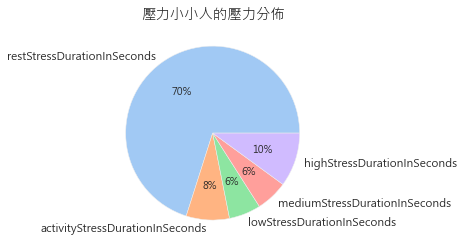

In [12]:
#壓力小小人
_1102_mr__10=id_group.get_group('1102_mr__10')
_1102_mr__12 =id_group.get_group('1102_mr__12')
#define data
# stressDurationInSeconds
# restStressDurationInSeconds
# activityStressDurationInSeconds
# lowStressDurationInSeconds
# mediumStressDurationInSeconds
# highStressDurationInSeconds
data_x = _1102_mr__10[['restStressDurationInSeconds',
'activityStressDurationInSeconds','lowStressDurationInSeconds',
'mediumStressDurationInSeconds','highStressDurationInSeconds']]
labels = ['restStressDurationInSeconds',
'activityStressDurationInSeconds','lowStressDurationInSeconds',
'mediumStressDurationInSeconds','highStressDurationInSeconds']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.title('壓力小小人的壓力分佈')
#create pie chart
plt.pie(data_x.mean(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()



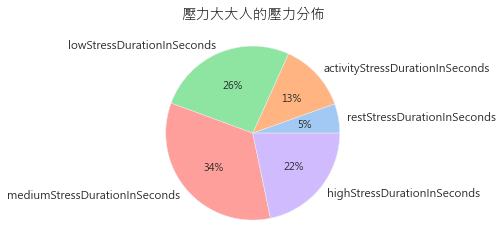

In [13]:
#壓力大大人
_1102_mr__10=id_group.get_group('1102_mr__10')
_1102_mr__12 =id_group.get_group('1102_mr__12')
#define data
# stressDurationInSeconds
# restStressDurationInSeconds
# activityStressDurationInSeconds
# lowStressDurationInSeconds
# mediumStressDurationInSeconds
# highStressDurationInSeconds
data_x = _1102_mr__12[['restStressDurationInSeconds',
'activityStressDurationInSeconds','lowStressDurationInSeconds',
'mediumStressDurationInSeconds','highStressDurationInSeconds']]
labels = ['restStressDurationInSeconds',
'activityStressDurationInSeconds','lowStressDurationInSeconds',
'mediumStressDurationInSeconds','highStressDurationInSeconds']
plt.title('壓力大大人的壓力分佈')
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data_x.mean(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

<font color=#FF6600>sleep<font color>
====


In [14]:
df_sleeps=pd.read_csv('sleeps_concat.csv')
df_level=pd.read_csv('levelsmap_concat.csv')
df_sleeps['id']=df_sleeps['id'].str.replace('sleeps','')
df_sleeps['startTimeInSeconds'] = pd.to_datetime(df_sleeps['startTimeInSeconds'],unit='s')
df_sleeps=df_sleeps.rename(columns={'startTimeInSeconds':'new_date'})


In [15]:

df_sleeps.date[df_sleeps.date=='2020-09-27']='927'
df_sleeps.date[df_sleeps.date=='2020-09-28']='928'
df_sleeps.date[df_sleeps.date=='2020-09-29']='929'
df_sleeps.date[df_sleeps.date=='2020-09-30']='930'
df_sleeps.date[df_sleeps.date=='2020-10-07']='1007'
df_sleeps.date[df_sleeps.date=='2020-10-16']='1016'
df_sleeps.date[df_sleeps.date=='2020-10-19']='1019'
df_sleeps.date[df_sleeps.date=='2020-10-20']='1020'
df_sleeps.date[df_sleeps.date=='2020-10-21']='1021'
df_sleeps.date[df_sleeps.date=='2020-10-22']='1022'
df_sleeps.date[df_sleeps.date=='2020-10-23']='1023'
df_sleeps.date[df_sleeps.date=='2020-10-25']='1025'
df_sleeps.date[df_sleeps.date=='2020-10-26']='1026'
df_sleeps.date[df_sleeps.date=='2020-10-27']='1027'
df_sleeps.date[df_sleeps.date=='2020-10-28']='1028'
df_sleeps.date[df_sleeps.date=='2020-10-29']='1029'
df_sleeps.date[df_sleeps.date=='2020-10-30']='1030'
df_sleeps.date[df_sleeps.date=='2020-10-15']='1015'
df_sleeps.date[df_sleeps.date=='2020-10-17']='1017'
df_sleeps.date[df_sleeps.date=='2020-10-18']='1018'
df_sleeps.date[df_sleeps.date=='2020-10-24']='1024'
df_sleeps.date[df_sleeps.date=='2020-10-31']='1031'
df_sleeps.date[df_sleeps.date=='2020-10-14']='1014'
df_sleeps.date[df_sleeps.date=='2020-09-26']='926'
df_sleeps.date[df_sleeps.date=='2020-10-06']='1006'
df_sleeps.date[df_sleeps.date=='2020-10-08']='1008'
df_sleeps.date[df_sleeps.date=='2020-10-10']='1010'

C:\Users\FXZ\AppData\Local\Temp/ipykernel_5660/3692582565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleeps.date[df_sleeps.date=='2020-09-27']='927'
C:\Users\FXZ\AppData\Local\Temp/ipykernel_5660/3692582565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleeps.date[df_sleeps.date=='2020-09-28']='928'
C:\Users\FXZ\AppData\Local\Temp/ipykernel_5660/3692582565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slee

In [16]:
df_sleeps[df_sleeps.duplicated()==True]
df_sleeps.drop_duplicates(inplace=True,keep='first',subset=['new_date','date','id','summaryId',])
df_sleeps['date']=df_sleeps['date'].astype(float)

以上為sleeps預處理
====

In [17]:
df_s_d=pd.merge(df_sleeps,df_dailies,on=['id','new_date'],suffixes=('_sleeps', '_dailies'))

In [18]:
df_s_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   awakeDurationInSeconds              44 non-null     float64       
 1   date_sleeps                         16 non-null     float64       
 2   deepSleepDurationInSeconds          44 non-null     float64       
 3   durationInSeconds_sleeps            44 non-null     float64       
 4   lightSleepDurationInSeconds         44 non-null     float64       
 5   id                                  44 non-null     object        
 6   remSleepInSeconds                   44 non-null     float64       
 7   new_date                            44 non-null     datetime64[ns]
 8   startTimeOffsetInSeconds_sleeps     44 non-null     float64       
 9   summaryId_sleeps                    44 non-null     object        
 10  unmeasurableSleepInSeconds  

<AxesSubplot:>

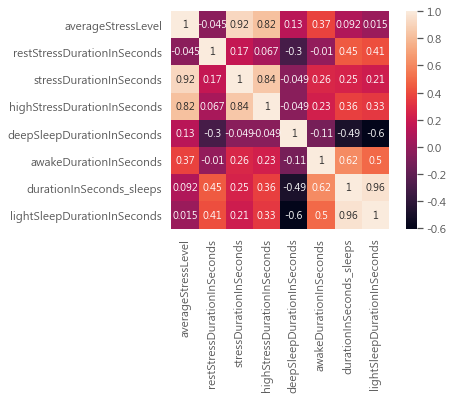

In [19]:
test=df_s_d[['averageStressLevel','restStressDurationInSeconds','stressDurationInSeconds','highStressDurationInSeconds',
'deepSleepDurationInSeconds','awakeDurationInSeconds','durationInSeconds_sleeps','lightSleepDurationInSeconds']]

test.corr()
sns.heatmap(test.corr(),square=True,annot=True)

深淺睡眠額外處理

In [20]:
data=pd.merge(df_sleeps,df_spo2,on=['summaryId','date'])
data=data.rename(columns={'id_x':'id'})
data=data.drop(columns=['id_y'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763058 entries, 0 to 763057
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   awakeDurationInSeconds       763058 non-null  float64       
 1   date                         213146 non-null  float64       
 2   deepSleepDurationInSeconds   763058 non-null  float64       
 3   durationInSeconds            763058 non-null  float64       
 4   lightSleepDurationInSeconds  763058 non-null  float64       
 5   id                           763058 non-null  object        
 6   remSleepInSeconds            763058 non-null  float64       
 7   new_date                     763058 non-null  datetime64[ns]
 8   startTimeOffsetInSeconds     763058 non-null  float64       
 9   summaryId                    763058 non-null  object        
 10  unmeasurableSleepInSeconds   763058 non-null  float64       
 11  validation                

In [21]:
data_mix=pd.merge(df_dailies,data,on=['id','new_date'])

In [22]:
data_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 0 to 5507
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   activeKilocalories                  5508 non-null   float64       
 1   activeTimeInSeconds                 5508 non-null   float64       
 2   activityStressDurationInSeconds     5508 non-null   float64       
 3   activityType                        5508 non-null   object        
 4   averageHeartRateInBeatsPerMinute    5508 non-null   float64       
 5   averageStressLevel                  5508 non-null   float64       
 6   bmrKilocalories                     5508 non-null   float64       
 7   date_x                              967 non-null    float64       
 8   distanceInMeters                    5508 non-null   float64       
 9   durationInSeconds_x                 5508 non-null   float64       
 10  floorsClimbed           

抓平均壓力大&小的人做spo2折線<br>
spo2 分類?

<AxesSubplot:>

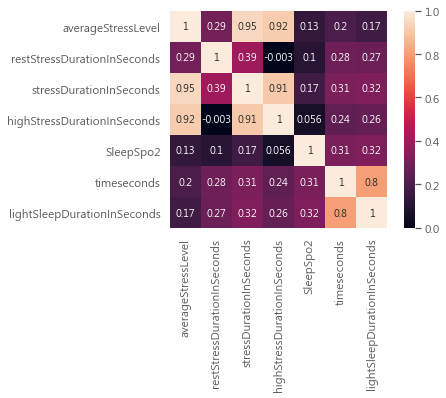

In [23]:
test=data_mix[['averageStressLevel','restStressDurationInSeconds','stressDurationInSeconds','highStressDurationInSeconds',
'SleepSpo2','timeseconds','lightSleepDurationInSeconds']]

test.corr()
sns.heatmap(test.corr(),square=True,annot=True)

In [25]:
df_spo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811593 entries, 0 to 811592
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SleepSpo2    811593 non-null  int64  
 1   date         261681 non-null  float64
 2   id           811593 non-null  object 
 3   summaryId    811593 non-null  object 
 4   timeseconds  811593 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 31.0+ MB
